# <center> **INTRODUCTION** <center/>
----
---

## Latar Belakang
_Transportation Security Administration_ (TSA), merupakan bagian dari sistem keamanan bandara di Amerika. TSA dirancang untuk menjaga keamanan bandara komersil dan bagasi di seluruh wilayah Amerika. TSA menetapkan standar tinggi soal keamanan. Seluruh penumpang akan diperiksa oleh agen TSA sebelum mereka melanjutkan perjalanan.

Setelah pemeriksaan, apabila terjadi kerusakan dan atau kehilangan, penumpang dapat mengajukan claim untuk penggantian kerusakan dan kehilangan tersebut. Semenjak TSA terbentuk dan sistem mulai berjalah, dari tahun 2002 claim yang diajukan sangatlah tinggi dari tahun ke tahun hingga data yang akan di analisis saat ini yaitu tahun 2015. Claim yang diajukan pun berbagai macam, mulai dari kehilangan barang setelah pengecekan, kerusakan bagasi, dan berbagai macam permasalahan lainnya.

## Pernyataan Masalah

Angka claim tinggi yang diajukan oleh penumpang ke pihak TSA menjadi _concern_ pihak TSA. TSA harus segera melakukan tindakan untuk memecahkan masalah tersebut. TSA dapat melakukan berbagai macam improvement untuk dapat menekan angka permasalahan claim tersebut. Tinggi nya claim yang diajukan sangat berdampak pada biaya yang harus dikeluarkan oleh TSA untuk melakukan ganti rugi. Dalam kondisi ini, TSA tidak mengetahui titik masalah terjadinya claim yang tinggi. Sedangkan improvement yang akan dilakukan harus tepat sasaran sehingga dapat berdampak signifikan.

Pada project ini akan dilakukan analisis terhadap permasalahan tingginya angka klaim tersebut. Hasil dari analisis ini dapat digunakan sebagai dasar TSA untuk melakukan improvement dan dapat menurunkan angka klaim yang diajukan oleh penumpang.

# <center> **DATA UNDERSTANDING** <center/>
---
---

Untuk menjawab permasalahan diatas, akan dilakukan analisis terhadap data claim yang terekam pada _database_ sistem yang digunakan oleh TSA. Database claim TSA data dapat didownload [di sini](https://www.kaggle.com/datasets/terminal-security-agency/tsa-claims-database/download)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, wilcoxon

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('tsa_claims.csv')
display(df.head(),df.tail())

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
204262,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
204263,2015123027969,17-Dec-15,2-Dec-15,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,-,-,NaN,NaN
204264,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN
204265,2016011328300,30-Dec-15,28-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,-,-,NaN,NaN
204266,2015123128015,31-Dec-15,23-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Personal Accessories,-,-,NaN,NaN


In [3]:
print(f'Jumlah Baris dan Kolom di Dataset df Adalah {df.shape}')
df.info()

Jumlah Baris dan Kolom di Dataset df Adalah (204267, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Claim Number   204267 non-null  object
 1   Date Received  204004 non-null  object
 2   Incident Date  202084 non-null  object
 3   Airport Code   195743 non-null  object
 4   Airport Name   195743 non-null  object
 5   Airline Name   169893 non-null  object
 6   Claim Type     196354 non-null  object
 7   Claim Site     203527 non-null  object
 8   Item           200301 non-null  object
 9   Claim Amount   200224 non-null  object
 10  Status         204262 non-null  object
 11  Close Amount   135315 non-null  object
 12  Disposition    131359 non-null  object
dtypes: object(13)
memory usage: 20.3+ MB


In [4]:
df.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,204267,204004,202084,195743,195743,169893,196354,203527,200301,200224,204262,135315,131359
unique,204258,4007,26807,465,485,318,11,6,4704,36117,15,17162,3
top,2013121110011,5-Dec-03,12/27/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,682,144,9596,9232,17553,117868,159753,36908,28445,68339,71546,68382


## Data Overview
Hasil diatas menampilkan dataset claim TSA, dapat dilihat bahwa terdapat 13 kolom dan 204.267 baris. Berikut merupakan informasi umum sebagai gambaran dari dataset claim TSA  :

**Deskripsi Kolom**

| Kolom | Keterangan 
|---|---|
| Claim Number  | Merupakan nomer registrasi / ID untuk tiap-tiap klaim
| Date Received | Tanggal diterimanya laporan
| Incident Date | Tanggal terjadinya insiden
| Airport Code  | Kode untuk tiap airport
| Airport Name	| Nama airport
| Airline Name  | Nama pesawat
| Claim Type	| Jenis klaim yang diajukan
| Claim Site	| Lokasi terjadinya insiden
| Item	        | Barang yang diklaim
| Claim Amount	| Jumlah nilai klaim yang diajukan
| Status	    | Status klaim
| Close Amount	| Jumlah nilai klaim yang dibayarkan
| Disposition   | Status klaim terakhir


Data statistik hanya dapat menampilkan informasi berupa count, uniqe total, top, dan frequensi. Hal ini karena semua informasi yang terdapat di database bertipe kategorikal. Jika kita lihat beberapa kolom harus kita ubah tipe datanya sehingga dapat memberikan informasi dan analisa statistik lainnya. Selain itu untuk masing-masing kolom terdapat cukup banyak data uniqe yang ditampilkan. Selanjutnya kita akan melakukan pengecekan terhadap data uniqe tersebut.

Proses ini kita lakukan untuk melihat anomali apa saja yang terdapat di dalam dataset kita, sehingga kita dapat mengambil langkah yang tepat dalam melakukan *data cleaning*

In [5]:
pd.set_option('display.max_colwidth', -1)

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

Column Name  Number of Unique  \
0   Claim Number   204258             
1   Date Received  4007               
2   Incident Date  26807              
3   Airport Code   465                
4   Airport Name   485                
5   Airline Name   318                
6   Claim Type     11                 
7   Claim Site     6                  
8   Item           4704               
9   Claim Amount   36117              
10  Status         15                 
11  Close Amount   17162              
12  Disposition    3                  

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

*__Kesimpulan Data Overview:__*
- Kolom **Claim Number** berisi kode unik untuk masing masing klaim yang sebenarnya tidak diperlukan dalam analisis. Sehingga kolom ini dapat diabaikan dalam analisis.
- Kolom **Date Received** dan **Incident Date** seharusnya ber-_type_ datetime.
- Kolom **Item** terdapat unique value yang sama (contoh: Cameras - Digital), tetapi dicantumkan lebih dari satu kali. Hal ini dikarenakan terdapat _white space_ pada nilai tersebut dan akan dihapus pada saat proses data cleaning.
- Kolom **Claim Amount** dan **Close Amount** terdapat special character seperti '$' , ';' , '-' (contoh: $2 ; 270.09). Sehingga, akan dilakukan penyamaan format dan type data yang seharusnya yaitu berupa numerik.
- Kolom **Status** terdapat informasi yang sama akan tetapi hanya penulisannya saja yang berbeda (contoh: 'Approved' dengan 'Approve in Full', 'Denied' dengan 'Deny', dll). Akan dilakukan pengkategorian dengan informasi yang sama.
- Semua kolom pada data kecuali claim number memiliki missing values (nan), sehingga akan dilakukan penanganan untuk mengatasi missing value tersebut.

## Missing Values Overview

In [6]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

Claim Number     0.000000 
Date Received    0.128753 
Incident Date    1.068699 
Airport Code     4.172970 
Airport Name     4.172970 
Airline Name     16.827975
Claim Type       3.873851 
Claim Site       0.362271 
Item             1.941576 
Claim Amount     1.979272 
Status           0.002448 
Close Amount     33.755820
Disposition      35.692501
dtype: float64

<AxesSubplot:>

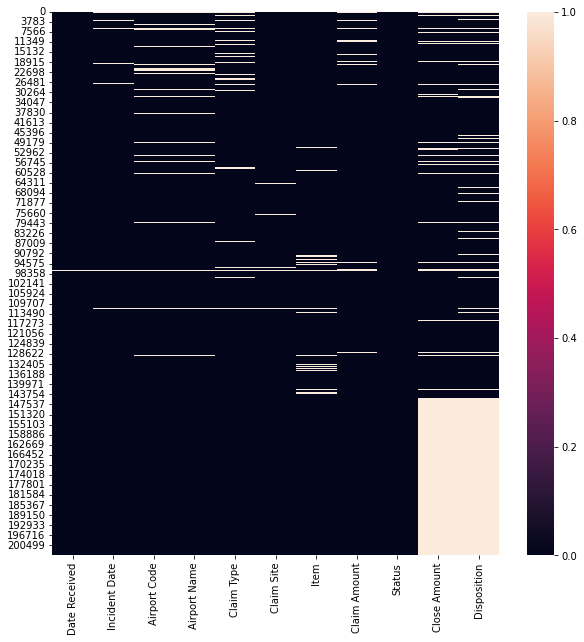

In [7]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['Date Received','Incident Date','Airport Code','Airport Name','Claim Type','Claim Site','Item','Claim Amount','Status','Close Amount','Disposition']].isna())

*__Kesimpulan Missing Values Overview:__*

- Kolom **Disposition** memiliki missing value tertinggi, mencapai **35.69%**. Dari informasi di atas dapat diketahui bahwa kolom Disposition berkaitan dengan kolom Status.
- Kolom **Close Amount** memiliki missing value tertinggi kedua, mencapai **33.75%**. Dari informasi di atas dapat diketahui bahwa kolom Close Amount berkaitan dengan kolom Claim Amount.
- Dapat dilihat di atas, persebaran missing value pada kolom Disposition berkaitan dengan kolom Close Amount. Rata-rata missing value yang terdapat pada kolom Disposition juga terdapat pada kolom Close Amount
- Missing value di beberapa kolom diantaranya Airline Name, Close Amount, dan Disposition mencapai lebih dari 10%

Sebelum melakukan proses analisis data, perlu dilakukan penanganan terhadap missing value pada masing-masing kolom. Dikarenakan persentase missing value yang tinggi pada beberapa kolom, data tidak dapat langsung dihapus karena dapat mempengaruhi hasil analisis statistik. Oleh karena itu, dapat dilakukan dengan mengisi missing value. Pengisian missing value dapat dilakukan dengan cara melihat hubungan antar kolom atau dapat dilakukan dengan mengisi missing value dengan median, mean, modus, maupun rasio tergantung pada kondisi masing-masing kolom.

# <center> **DATA CLEANING** <center/>
---
---

## Data Filtering

Berdasarkan informasi, seharusnya database merekam claim pada tahun 2002 hingga 2015. Apabila terdapat data di luar range tersebut, maka akan dilakukan penghapusan.

In [8]:
df['Date Received'] = pd.to_datetime(df['Date Received'])

In [9]:
df.loc[df['Date Received'] > '31/12/2015']

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
96936,2006051105953,2020-05-08,4/4/2006 0:00,JFK,John F. Kennedy International,NaN,Property Damage,Checked Baggage,Clocks - Inexpensive ($75.00 or less); Clothing - Shoes; belts; accessories; etc.; Lighting Supplies (globe domes; electric candlesticks; candelabra; etc.); Luggage (all types including footlockers),$637.76,Settled,$179.08,Settle
96937,2005051985068,2025-05-17,4/18/2005 0:00,MCO,Orlando International Airport,AirTran Airlines,Property Damage,Checked Baggage,Musical Instruments - Other - Over $250,$100.00,Approved,$100.00,Approve in Full
96938,2005060785897,2025-05-31,5/6/2005 0:00,OAK,Metropolitan Oakland International,Southwest Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),$65.00,Denied,$0.00,Deny
96939,2005090792253,2025-05-31,7/26/2005 0:00,LAX,Los Angeles International Airport,NaN,Property Damage,Checked Baggage,Locks,$250.00,Denied,$0.00,Deny
96940,2005081290465,2025-08-02,7/20/2005 0:00,SAN,San Diego International,Jet Blue,Passenger Property Loss,Checked Baggage,Photographic Film,$32.14,Canceled,$0.00,NaN
96941,2005081190381,2025-08-02,7/2/2005 0:00,ORD,Chicago O'Hare International Airport,LOT Polish Airlines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$599.00,Denied,$0.00,Deny
96942,0212087M,2040-02-12,12/20/2003 0:00,ATL,Hartsfield-Jackson Atlanta International Airport,NaN,Property Damage,Checked Baggage,Other,$8.48,Approved,$8.48,Approve in Full
96943,2004120368430,2044-10-18,10/3/2004 0:00,DTW,Detroit Metropolitan Wayne County Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$800.00,Denied,NaN,Deny
96944,2005051985108,2055-05-17,4/30/2005 0:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Other,$96.58,Denied,$0.00,Deny


In [10]:
df.drop(df[df['Date Received'] > '31/12/2015'].index, inplace=True)
df.drop(df[df['Date Received'] < '01/01/2002'].index, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204252 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Claim Number   204252 non-null  object        
 1   Date Received  203989 non-null  datetime64[ns]
 2   Incident Date  202069 non-null  object        
 3   Airport Code   195728 non-null  object        
 4   Airport Name   195728 non-null  object        
 5   Airline Name   169881 non-null  object        
 6   Claim Type     196339 non-null  object        
 7   Claim Site     203512 non-null  object        
 8   Item           200286 non-null  object        
 9   Claim Amount   200209 non-null  object        
 10  Status         204247 non-null  object        
 11  Close Amount   135301 non-null  object        
 12  Disposition    131345 non-null  object        
dtypes: datetime64[ns](1), object(12)
memory usage: 21.8+ MB


In [12]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

Claim Number     0.000000 
Date Received    0.128763 
Incident Date    1.068778 
Airport Code     4.173276 
Airport Name     4.173276 
Airline Name     16.827742
Claim Type       3.874136 
Claim Site       0.362298 
Item             1.941719 
Claim Amount     1.979418 
Status           0.002448 
Close Amount     33.757809
Disposition      35.694632
dtype: float64

## Penanganan Missing Value

### Penanganan Missing Value pada Kolom Disposition dan Status
Untuk _handle missing value_, maka dapat dilakukan dari data yang memiliki _missing value_ dengan persentasi tertinggi, yaitu kolom Disposition.

- Dapat diketahui bahwa data pada kolom Disposition merupakan representasi dari data pada kolom Status. Maka jika pada kolom Disposition terdapat missing value, maka missing valua tersebut dapat diisi dengan nilai pada kolom status.
- Pada kolom status, banyak terdapat kategori. Kemudian kategori tersebut, dapat kita ringkas menjadi 3 kategori, yaitu:
1. Denied   
2. Approved
3. Settled
- Selain 3 kategori tersebut, maka data tidak akan digunakan dan akan dihapus.
- Kolom Disposition juga mengikuti kategori diatas.

In [13]:
display(df['Status'].value_counts())

Denied                                                                                                                           68331
Approved                                                                                                                         34997
Deny                                                                                                                             28237
Settled                                                                                                                          27954
-                                                                                                                                12752
Approve in Full                                                                                                                  12364
Canceled                                                                                                                         7017 
Settle                                                 

In [14]:
valid_targets = ['Denied','Approved','Deny','Settled','Approve in Full','Settle']

df = df[df.Status.isin(valid_targets)]
df.Status.replace('Approve in Full','Approved',inplace=True)
df.Status.replace('Deny','Denied',inplace=True)
df.Status.replace('Settle','Settled',inplace=True)

print(df.Status.value_counts())
print(len(df))

Denied      96568
Approved    47361
Settled     33720
Name: Status, dtype: int64
177649


In [15]:
df.loc[(df['Disposition'].isna()),['Disposition']]= df['Status']

In [16]:
df[['Close Amount', 'Disposition']].isna().sum()

Close Amount    47776
Disposition     0    
dtype: int64

In [17]:
df['Disposition'].value_counts()

Deny               68289
Approve in Full    34997
Denied             28279
Settle             27954
Approved           12364
Settled            5766 
Name: Disposition, dtype: int64

In [18]:
df.Disposition.replace('Approve in Full','Approved',inplace=True)
df.Disposition.replace('Deny','Denied',inplace=True)
df.Disposition.replace('Settle','Settled',inplace=True)

In [19]:
df['Disposition'].value_counts()

Denied      96568
Approved    47361
Settled     33720
Name: Disposition, dtype: int64

In [20]:
df[['Disposition', 'Status']].isna().sum()

Disposition    0
Status         0
dtype: int64

### Penanganan Missing Value pada Kolom Claim Amount
- Data missing value akan diisi dengan nilai 0, dianggap bahwa claim hanya diajukan tanpa permintaan ganti rugi.
- Menghapus seluruh special character pada kolom.
- Mengubah type data menjadi type data numeric.

In [21]:
# Delete special character
df['Claim Amount'] = df['Claim Amount'].str.replace(';','').str.replace('$','').str.replace('-','0')
df['Claim Amount'] = pd.to_numeric(df['Claim Amount'], errors='coerce')

In [22]:
df.loc[df['Claim Amount']==0.00]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
2603,0702509M,2003-02-13,12/31/2002 0:00,MCO,Orlando International Airport,UAL,Property Damage,Checked Baggage,Locks,0.0,Denied,$0.00,Denied
10289,0708149M,2003-07-08,6/13/2003 0:00,OAK,Metropolitan Oakland International,UAL,Passenger Property Loss,Checked Baggage,Jewelry - Fine,0.0,Denied,$0.00,Denied
10933,0715177M,2003-07-15,7/1/2003 0:00,SEA,Seattle-Tacoma International,NaN,Passenger Property Loss,Checkpoint,Other,0.0,Denied,$0.00,Denied
16885,0929001M,2003-09-29,8/30/2003 0:00,SAN,San Diego International,UAL,Passenger Property Loss,Checked Baggage,Other,0.0,Denied,$0.00,Denied
17088,1002092M,2003-10-02,9/24/2003 0:00,MCO,Orlando International Airport,NaN,NaN,Checkpoint,Cell Phones,0.0,Denied,$0.00,Denied
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204161,2015072023983,2015-07-13,6-Jul-15,YNG,Youngstown-Warren Regional,Allegiant Air,Passenger Property Loss,Checked Baggage,Baggage/Cases/Purses,0.0,Denied,NaN,Denied
204165,2015042722126,2015-04-27,22-Apr-15,YUM,Yuma International Airport,USAir,Passenger Property Loss,Checked Baggage,Computer & Accessories,0.0,Denied,NaN,Denied
204169,2015102126149,2015-10-01,30-Sep-15,YUM,Yuma International Airport,American Airlines,Passenger Property Loss,Checkpoint,Currency,0.0,Denied,NaN,Denied
204181,2015050822378,2015-05-05,9-Apr-15,ZZX,Non TSA Airport (motor vehicle),-,Motor Vehicle,Motor Vehicle,Other,0.0,Denied,NaN,Denied


In [23]:
df['Claim Amount'].fillna(0, inplace=True)

In [24]:
df['Claim Amount'].isna().sum()

0

### Penanganan Missing Value pada Kolom Close Amount
- Menghapus seluruh special character pada kolom.
- Mengubah type data menjadi type data numeric.
- Penanganan missing value pada kolom close amount berdasarkan kolom Disposition dan Claim Amount:
1. Jika kolom Disposition berisi kategori denied, maka missing value akan diisi dengan 0. Hal ini karena claim yang diajukan ditolak
2. Jika kolom Disposition berisi kategori approved, maka missing value akan diisi dengan nilai yang sama pada kolom Claim Amount. Hal ini karena nilai claim yang diajukan akan sepenuhnya diberikan.
3. Jika kolom Disposition berisi kategori settled, maka missing value akan diisi dengan melihat rasio antara Close Amount dan Claim Amount yang terisi penuh pada kedua kolom tesebut karena keduanya saling berhubungan.


In [25]:
df['Close Amount'] = df['Close Amount'].str.replace(';','').str.replace('$','').str.replace('-','0')
df['Close Amount'] = pd.to_numeric(df['Close Amount'])

In [26]:
df.loc[df['Disposition']=='Denied','Close Amount']=0

In [27]:
# Mengecek missing value
df[df['Close Amount'].isna()]['Disposition'].value_counts()

Approved    12497
Settled     5766 
Name: Disposition, dtype: int64

In [28]:
df.loc[(df['Close Amount'].isna())&(df['Disposition']=='Approved'),'Close Amount']=df['Claim Amount']

In [29]:
# Mengecek missing value
df[df['Close Amount'].isna()]['Disposition'].value_counts()

Settled    5766
Name: Disposition, dtype: int64

In [30]:
# Mengecek Rasio dari close amount dan claim amount
diff = df['Close Amount'].loc[df.Disposition=='Settled']/df['Claim Amount']
diff.value_counts()

0.500000    9210
0.250000    385 
0.333333    287 
inf         221 
0.900000    210 
           ...  
0.790608    1   
0.280822    1   
0.386907    1   
0.352601    1   
0.672704    1   
Length: 13173, dtype: int64

Dari median rasio bisa kita lihat bahwa nilai Close Amount pada kategori settled yang dibayarkan sebesar 50% dari nilai claim yang diajukan.

In [31]:
df['Close Amount'].fillna(df['Claim Amount']*0.5, inplace=True)

In [32]:
df.loc[df['Disposition']=='Settled']

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
1,0202417M,2002-02-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.00,Settled,50.000,Settled
2,0202445M,2002-02-04,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.920,Settled
5,2005032479636,2002-02-18,2/17/2005 0:00,CAK,Akron-Canton Regional,Air Tran Airlines(do not use),Passenger Property Loss,Checked Baggage,Other,459.01,Settled,227.000,Settled
21,16410,2002-07-24,7/10/2002 0:00,SDF,Louisville International,Delta Air Lines,Passenger Property Loss,Checkpoint,Luggage (all types including footlockers),600.00,Settled,337.400,Settled
23,2004092763985,2002-08-08,7/26/2002 0:00,NaN,NaN,NaN,NaN,Other,Other,160.00,Settled,149.080,Settled
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204158,2015032721574,2015-03-27,12-Mar-15,YKM,Yakima Air Terminal-Mcallister,American Airlines,Property Damage,Checked Baggage,Baggage/Cases/Purses,189.99,Settled,94.995,Settled
204162,2015080424556,2015-07-30,20-Jul-15,YNG,Youngstown-Warren Regional,Allegiant Air,Passenger Property Loss,Checked Baggage,Baggage/Cases/Purses; Travel Accessories,3.00,Settled,1.500,Settled
204173,2014121619219,2015-03-17,3-Dec-14,ZZX,Non TSA Airport (motor vehicle),-,Personal Injury,Motor Vehicle,-,4531.16,Settled,2265.580,Settled
204176,2015032721575,2015-03-27,9-Sep-14,ZZX,Non TSA Airport (motor vehicle),-,Motor Vehicle,Motor Vehicle,-,2206.35,Settled,1103.175,Settled


In [33]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

Claim Number     0.000000 
Date Received    0.066986 
Incident Date    0.432876 
Airport Code     2.350703 
Airport Name     2.350703 
Airline Name     15.925786
Claim Type       3.311586 
Claim Site       0.153674 
Item             1.618360 
Claim Amount     0.000000 
Status           0.000000 
Close Amount     0.000000 
Disposition      0.000000 
dtype: float64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177649 entries, 0 to 204206
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Claim Number   177649 non-null  object        
 1   Date Received  177530 non-null  datetime64[ns]
 2   Incident Date  176880 non-null  object        
 3   Airport Code   173473 non-null  object        
 4   Airport Name   173473 non-null  object        
 5   Airline Name   149357 non-null  object        
 6   Claim Type     171766 non-null  object        
 7   Claim Site     177376 non-null  object        
 8   Item           174774 non-null  object        
 9   Claim Amount   177649 non-null  float64       
 10  Status         177649 non-null  object        
 11  Close Amount   177649 non-null  float64       
 12  Disposition    177649 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(10)
memory usage: 23.0+ MB


### Penanganan Missing Value pada Kolom Categorical

Pada kolom Airport Code, Airport Name, Airline Name, Claim Type, Claim Site dan Item, akan dilakukan penanganan sebagai berikut:
- Value '-' akan diganti menjadi 'Not Define' untuk memudahkan analisis.
- Value yang memilki white space pada kolom tersebut akan dihapus.
- Karena jumlah missing value pada kolom tersebut persentasenya cukup tinggi, maka Missing value pada kolom tersebut akan diisi dengan kategori Not Define. Hal ini karena data pada kolom lain dapat berguna untuk analisis.

Referensi dapat dilihat [di sini](https://pianalytix.com/how-do-you-handle-missing-values-categorical-data-and-feature-scaling-in-machine-learning/#:~:text=When%20missing%20values%20is%20from,replaced%20with%20a%20new%20category)

In [35]:
df['Airport Code'].replace('-','Not Define', inplace=True)
df['Airport Code']=df['Airport Code'].str.strip()
df['Airport Name'].replace('-','Not Define', inplace=True)
df['Airport Name']=df['Airport Name'].str.strip()
df['Airline Name'].replace('-','Not Define', inplace=True)
df['Airline Name']=df['Airline Name'].str.strip()
df['Claim Type'].replace('-','Not Define', inplace=True)
df['Claim Type']=df['Claim Type'].str.strip()
df['Claim Site'].replace('-','Not Define', inplace=True)
df['Claim Site']=df['Claim Site'].str.strip()
df['Item'].replace('-','Not Define', inplace=True)
df['Item']=df['Item'].str.strip()

In [36]:
fill_columns = ['Airline Name','Airport Name','Airport Code','Claim Type','Claim Site','Item']
df[fill_columns] = df[fill_columns].fillna('Not Define')
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,2002-01-04,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approved
1,0202417M,2002-02-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,Not Define,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.00,Settled,50.00,Settled
2,0202445M,2002-02-04,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settled
3,0909816M,2002-02-07,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approved
4,2005032379513,2002-02-18,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approved,84.79,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204189,2015070223650,2015-06-29,8-May-15,ZZX,Non TSA Airport (motor vehicle),Not Define,Employee Loss (MPCECA),Motor Vehicle,Not Define,250.00,Approved,250.00,Approved
204202,2015092425588,2015-09-10,31-Aug-15,ZZX,Non TSA Airport (motor vehicle),Not Define,Motor Vehicle,Other,Not Define,656.56,Approved,656.56,Approved
204203,2015102026116,2015-09-29,22-Sep-15,ZZX,Non TSA Airport (motor vehicle),Not Define,Motor Vehicle,Motor Vehicle,Not Define,1520.85,Approved,1520.85,Approved
204204,2015101326019,2015-10-13,16-Jul-15,ZZX,Non TSA Airport (motor vehicle),Not Define,Motor Vehicle,Motor Vehicle,Not Define,643.32,Approved,643.32,Approved


In [37]:
df.isna().sum()/df.shape[0]*100

Claim Number     0.000000
Date Received    0.066986
Incident Date    0.432876
Airport Code     0.000000
Airport Name     0.000000
Airline Name     0.000000
Claim Type       0.000000
Claim Site       0.000000
Item             0.000000
Claim Amount     0.000000
Status           0.000000
Close Amount     0.000000
Disposition      0.000000
dtype: float64

### Penanganan Missing Value pada Kolom Incident Date & Date Received

- Incident Data akan diambil dari range 2002-2015.
- Mengubah menjadi tipe data datetime.
- Penyamaan format pada Kolom Incident Date (ex : 29-Mar-13 dan 12/26/2004).
- Pada Data Overview, dapat diketahui selalu ada selisih antara Date Received dengan Incident Data. Laporan kejadian (Date Received) akan diterima beberapa hari setelah kejadian terjadi (Incident Date). Sehingga, missing value akan diisi dengan median dari hasil pengurangan Date Received dengan Incident Date. Missing value tidak langusng dihapus karena tidak semua missing value ada pada kedua kolom tersebut, sehingga kedua kolom yang nilainya tidak lengkap dapat dicari dan diisi.

In [38]:
# jumlah missing value di kolom 'Date Received' dan 'Incident Date'
df[['Date Received', 'Incident Date']].isna().sum()

Date Received    119
Incident Date    769
dtype: int64

In [39]:
df['Incident Date'].value_counts()

12/26/2004 0:00     131
12/27/2004 0:00     126
12/29/2003 0:00     126
12/22/2004 0:00     123
1/4/2004 0:00       121
                   ... 
12/5/2010 10:30     1  
10/31/2010 22:30    1  
11/16/2010 5:00     1  
11/30/2010 7:40     1  
29-Mar-13           1  
Name: Incident Date, Length: 23437, dtype: int64

In [40]:
df['Incident Date'] = pd.to_datetime(df['Incident Date'],errors='coerce')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177649 entries, 0 to 204206
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Claim Number   177649 non-null  object        
 1   Date Received  177530 non-null  datetime64[ns]
 2   Incident Date  176736 non-null  datetime64[ns]
 3   Airport Code   177649 non-null  object        
 4   Airport Name   177649 non-null  object        
 5   Airline Name   177649 non-null  object        
 6   Claim Type     177649 non-null  object        
 7   Claim Site     177649 non-null  object        
 8   Item           177649 non-null  object        
 9   Claim Amount   177649 non-null  float64       
 10  Status         177649 non-null  object        
 11  Close Amount   177649 non-null  float64       
 12  Disposition    177649 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 23.0+ MB


In [42]:
df['Incident Date'].value_counts()

2004-12-26 00:00:00    131
2003-12-29 00:00:00    126
2004-12-27 00:00:00    126
2004-12-22 00:00:00    123
2004-01-04 00:00:00    121
                      ... 
2010-11-15 05:45:00    1  
2010-10-17 17:10:00    1  
2010-08-26 06:10:00    1  
2010-12-26 10:20:00    1  
2015-12-19 00:00:00    1  
Name: Incident Date, Length: 23097, dtype: int64

In [43]:
df.drop(df[df['Incident Date'] > '31/12/2015'].index, inplace=True)
df.drop(df[df['Incident Date'] < '01/01/2002'].index, inplace=True)

In [44]:
# jumlah missing value di kolom 'Date Received' dan 'Incident Date'
df[['Date Received', 'Incident Date']].isna().sum()

Date Received    119
Incident Date    913
dtype: int64

In [45]:
# Pengecekan Missing value (Insident date NaT, tapi terdapat data di date received)
df.loc[df['Incident Date'].isna()]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
14,0616771L,2002-07-12,NaT,Not Define,Not Define,Not Define,Not Define,Other,Clothing - Shoes; belts; accessories; etc.,0.00,Denied,0.0,Denied
22,0616723L,2002-08-05,NaT,Not Define,Not Define,Not Define,Not Define,Other,Clothing - Shoes; belts; accessories; etc.,0.00,Denied,0.0,Denied
249,0616725L,2002-11-14,NaT,Not Define,Not Define,Not Define,Not Define,Other,Clothing - Shoes; belts; accessories; etc.,0.00,Denied,0.0,Denied
327,0616645L,2002-11-20,NaT,DTW,Detroit Metropolitan Wayne County Airport,Not Define,Not Define,Other,Cell Phones,0.00,Denied,0.0,Denied
328,0616747L,2002-11-20,NaT,Not Define,Not Define,Not Define,Not Define,Other,Other,0.00,Denied,0.0,Denied
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138597,2009062560620,2009-06-19,NaT,DEN,Denver International Airport,UAL,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,150.00,Denied,0.0,Denied
138786,2009062660665,2009-06-25,NaT,MDW,Midway International Airport,Southwest Airlines,Passenger Property Loss,Checked Baggage,Cosmetics - Perfume; toilet articles; medicines; soaps; etc.,251.75,Denied,0.0,Denied
139491,2009072161530,2009-07-14,NaT,GSP,Greenville-Spartanburg,USAir,Property Damage,Checked Baggage,Ceramics - Animals; etc.,20.00,Denied,0.0,Denied
139731,2009072861869,2009-07-20,NaT,PHX,Phoenix Sky Harbor International,Alaska Airlines,Property Damage,Checked Baggage,Locks,20.00,Denied,0.0,Denied


Text(0.5, 0, 'Year')

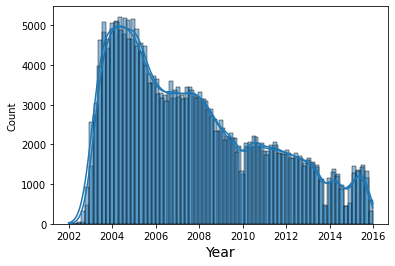

In [46]:
sns.histplot(df['Date Received'], kde=True)
sns.histplot(df['Incident Date'], kde=True)
plt.xlabel('Year', size=14)

- Grafik diatas menunjukkan data Date Received dan Incident Date memiliki persebaran data yang sama dan membuktikan bahwa kedua data saling berkorelasi.
- Grafik histogram menunjukkan bahwa data tidak terdistribusi normal, sehingga Nilai missing value dapat diisi dengan median data ([Referensi](https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/#Impute_Replace_Missing_Values_with_Median)).

In [47]:
diff_date = df['Date Received']-df['Incident Date']
diff_date.median()

Timedelta('23 days 00:00:00')

In [48]:
df.loc[(df['Incident Date'].isna()),'Incident Date']= df['Date Received']-pd.offsets.Day(23)
df.loc[(df['Date Received'].isna()),'Date Received']=df['Incident Date']+pd.offsets.Day(23)

In [49]:
# Drop incident date dan date received yang kosong
df.drop(df[df['Incident Date'].isna()].index, inplace=True)

In [50]:
# jumlah missing value di kolom 'Date Received' dan 'Incident Date'
df[['Date Received', 'Incident Date']].isna().sum()

Date Received    0
Incident Date    0
dtype: int64

## Penanganan Outlier

In [51]:
# df.describe(include='object')
display(df.describe(),df.describe(include='object'))

,Claim Amount,Close Amount
count,1.776160e+05,177616.000000
mean,1.692681e+07,85.376844
std,7.118370e+09,504.308469
min,0.000000e+00,0.000000
25%,2.500000e+01,0.000000
50%,1.080000e+02,0.000000
75%,3.400000e+02,65.000000
max,3.000000e+12,125000.000000


,Claim Number,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Status,Disposition
count,177616,177616,177616,177616,177616,177616,177616,177616,177616
unique,177616,454,455,227,10,6,4390,3,3
top,0909802M,LAX,Los Angeles International Airport,Not Define,Passenger Property Loss,Checked Baggage,Other,Denied,Denied
freq,1,8615,8615,31119,102152,141034,32458,96554,96554


In [52]:
# IQR = Q3-Q1
Q1 = df['Claim Amount'].describe()['25%']
Q3 = df['Claim Amount'].describe()['75%']
IQR = Q3-Q1
upper = Q3 + 1.5*IQR # batas atas
lower = Q1 - 1.5*IQR # batas bawah
print('upper :',upper)
print('lower :',lower)

upper : 812.5
lower : -447.5


<AxesSubplot:xlabel='Claim Amount'>

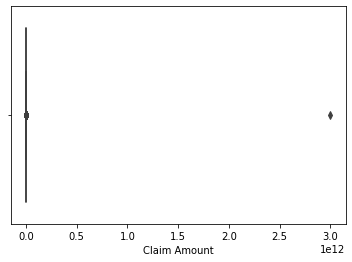

In [53]:
sns.boxplot(df['Claim Amount'])

In [54]:
# Drop outliers
df.drop(df[df['Claim Amount'] > 812.5].index, inplace=True)

<AxesSubplot:xlabel='Claim Amount'>

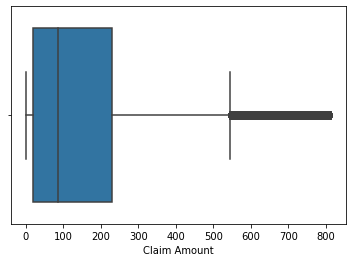

In [55]:
sns.boxplot(df['Claim Amount'])

In [56]:
# IQR = Q3-Q1
q1 = df['Close Amount'].describe()['25%']
q3 = df['Close Amount'].describe()['75%']
iqr = q3-q1
upper_cl = q3 + 1.5*iqr # batas atas
lower_cl = q1 - 1.5*iqr # batas bawah
print('upper :',upper_cl)
print('lower :',lower_cl)

upper : 162.35
lower : -97.41


<AxesSubplot:xlabel='Close Amount'>

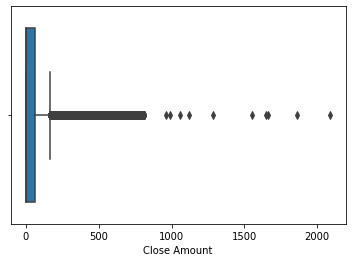

In [57]:
sns.boxplot(df['Close Amount'])

In [58]:
# Drop outliers
df.drop(df[df['Close Amount'] > 162.35].index, inplace=True)

<AxesSubplot:xlabel='Close Amount'>

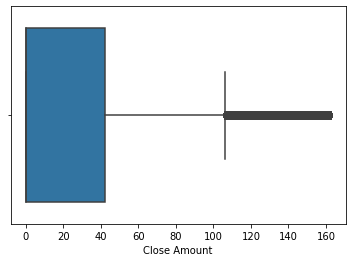

In [59]:
sns.boxplot(df['Close Amount'])

In [60]:
# df.describe(include='object')
display(df.describe(),df.describe(include='object'))

,Claim Amount,Close Amount
count,140320.000000,140320.00000
mean,127.120318,25.29603
std,162.802615,40.09375
min,0.000000,0.00000
25%,12.000000,0.00000
50%,67.000000,0.00000
75%,169.200000,42.39000
max,812.320000,162.34000


,Claim Number,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Status,Disposition
count,140320,140320,140320,140320,140320,140320,140320,140320,140320
unique,140320,451,452,222,10,6,3308,3,3
top,0202417M,LAX,Los Angeles International Airport,Not Define,Passenger Property Loss,Checked Baggage,Other,Denied,Denied
freq,1,6083,6083,23955,79778,115304,27123,81750,81750


- Nilai outlier dapat kita lihat dari perhitungan IQR. Hasil IQR diatas menunjukkan adanya data outlier pada kolom Claim Amount dan Close Amount karena terdapat nilai yang melewati batas interval bawah (low gate) dan batas interval atas (above gate)
- Outlier dihapus

# <center> **FINAL DATA** <center/>
---
---

In [61]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(140320, 13)


,dataFeatures,dataType,null,unique,uniqueSample
0,Claim Number,object,0,140320,"[2007081330124, 2013032002666]"
1,Date Received,datetime64[ns],0,3813,"[2004-09-11T00:00:00.000000000, 2012-03-13T00:00:00.000000000]"
2,Incident Date,datetime64[ns],0,21038,"[2015-01-25T00:00:00.000000000, 2010-07-09T18:08:00.000000000]"
3,Airport Code,object,0,451,"[IMT, BFD]"
4,Airport Name,object,0,452,"[Arcata-Eureka, Monroe Regional]"
5,Airline Name,object,0,222,"[Grupo TACA, JALways Airlines]"
6,Claim Type,object,0,10,"[Bus Terminal, Property Damage]"
7,Claim Site,object,0,6,"[Checkpoint, Motor Vehicle]"
8,Item,object,0,3308,"[Computer & Accessories; Jewelry & Watches; Jewelry & Watches; Other; Personal Electronics, Clothing; Personal Electronics; Travel Accessories]"
9,Claim Amount,float64,0,21037,"[13.07, 623.16]"


**_Kesimpulan:_**

- Setelah melakukan data filtering, penangan missing value, dan penanganan data outlier, jumlah data yang sudah bersih menjadi 140.320 baris dan 13 kolom.
- 59.943 baris data dihapus dari total 204.267

# <center> **DATA ANALYSIS** <center/>
---
---

## Data Analysis Introduction

Setelah data dibersihkan, maka tahap selanjutnya adalah melakukan analisis data. Hasil dari analisis tersebut kemudian ditarik kesimpulan, sehingga pihak TSA dapat melakukan improvement yang efektif untuk mengurangi angka claim dan mengurangi cost yang dikeluarkan TSA sebagai ganti rugi atas claim yang diajukan.

Oleh sebab itu, maka analisis harus mampu menjawab beberapa pertanyaan sebagai berikut:
1. Apakah insident terpusat pada periode dan lokasi tertentu? Jenis klaim apa yang sering diajukan?
2. Item apa yang sering diajukan claim?
3. Apakah insiden terspusat pada bandara tertentu?
4. Apakah terdapat error pada sistem?

In [62]:
df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
1,0202417M,2002-02-02,2004-01-16,SEA,Seattle-Tacoma International,Not Define,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.00,Settled,50.00,Settled
3,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approved
4,2005032379513,2002-02-18,2005-02-05,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approved,84.79,Approved
6,2007050124750,2002-04-30,2007-04-26,PHL,Philadelphia International Airport,USAir,Passenger Property Loss,Checked Baggage,Professional Equipment,106.52,Approved,106.52,Approved
7,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Not Define,Checkpoint,Clothing - Shoes; belts; accessories; etc.,75.00,Approved,75.00,Approved


In [63]:
# df.describe(include='object')
display(df.describe(),df.describe(include='object'))

,Claim Amount,Close Amount
count,140320.000000,140320.00000
mean,127.120318,25.29603
std,162.802615,40.09375
min,0.000000,0.00000
25%,12.000000,0.00000
50%,67.000000,0.00000
75%,169.200000,42.39000
max,812.320000,162.34000


,Claim Number,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Status,Disposition
count,140320,140320,140320,140320,140320,140320,140320,140320,140320
unique,140320,451,452,222,10,6,3308,3,3
top,0202417M,LAX,Los Angeles International Airport,Not Define,Passenger Property Loss,Checked Baggage,Other,Denied,Denied
freq,1,6083,6083,23955,79778,115304,27123,81750,81750


In [64]:
df.groupby('Disposition')['Claim Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Disposition,,,,,,,,
Approved,36634.0,56.119271,42.442674,0.0,21.34,45.000,81.54,750.00
Denied,81750.0,152.095779,196.603930,0.0,0.00,65.000,248.00,812.32
Settled,21936.0,152.617606,105.325995,0.0,75.00,129.465,200.00,809.00


Dari deskripsi statistik di atas terdapat beberapa hal yang dapat dianalisa diantaranya :
- Rata-rata nilai claim yang diajukan (Claim Amount) dari tahun 2002-2015 adalah $127,12 per Insiden.
- Kolom Claim Amount dan Close Amount menunjukkan distribusi tidak normal (right skewed). Hal ini bisa kita lihat dari nilai mean > median.
- Penolakan Claim yang diajukan kepada TSA paling tinggi, ini bisa dilihat pada frequensi diatas.
- Claim Type tertinggi yaitu Type Property Loss pada saat Chehcked Baggage.
- Claim Type tertinggi terjadi pada Los Angeles International Airport.

Kemudian, dari deskripsi statistik tersebut, dapat dijabarkan lebih detail lagi pada analisis di bawah untuk dapat menjawab pertanyaan-pertanyaan yang telah diajukan 

## 1. Apakah insiden terpusat pada periode dan lokasi tertentu? Jenis klaim apa yang sering diajukan?

In [65]:
df['year'] = pd.DatetimeIndex(df['Incident Date']).year
df['year_received'] = pd.DatetimeIndex(df['Date Received']).year
df['month'] = pd.DatetimeIndex(df['Incident Date']).month
df['day'] = pd.DatetimeIndex(df['Incident Date']).weekday

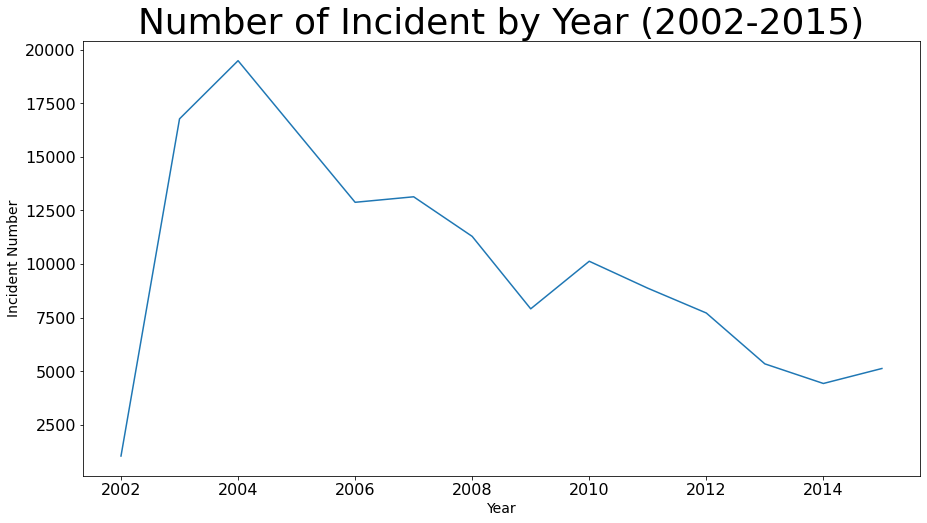

In [66]:
claims_count_incident = df['year'].value_counts()

plt.figure(figsize=(15, 8))
yplot=sns.lineplot(claims_count_incident.index, claims_count_incident.values, palette = 'deep')
yplot.grid(False)
plt.xlabel('Year', size=14)
plt.ylabel('Incident Number', size=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Number of Incident by Year (2002-2015)', fontsize=36)
plt.show()


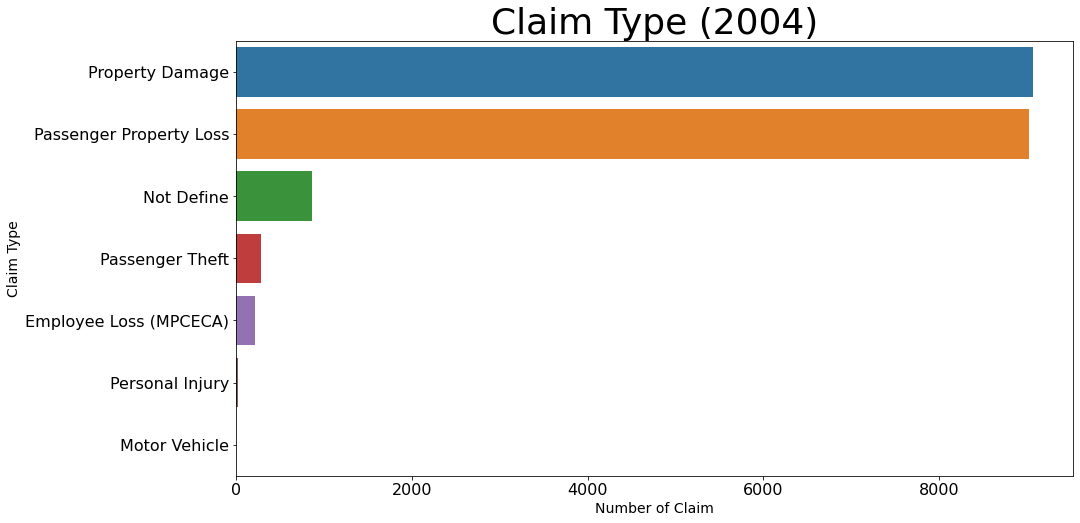

In [67]:
claim_type_2004 = df.loc[(df['year']==2004),'Claim Type'].value_counts()

claim_2004_index = claim_type_2004.index
claim_2004_values = claim_type_2004.values

plt.figure(figsize=(15,8))
sns.barplot(y=claim_2004_index, x=claim_2004_values, orient='horizontal')
plt.xlabel('Number of Claim', fontsize=14)
plt.ylabel('Claim Type', fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Claim Type (2004)', fontsize=36)
plt.show()


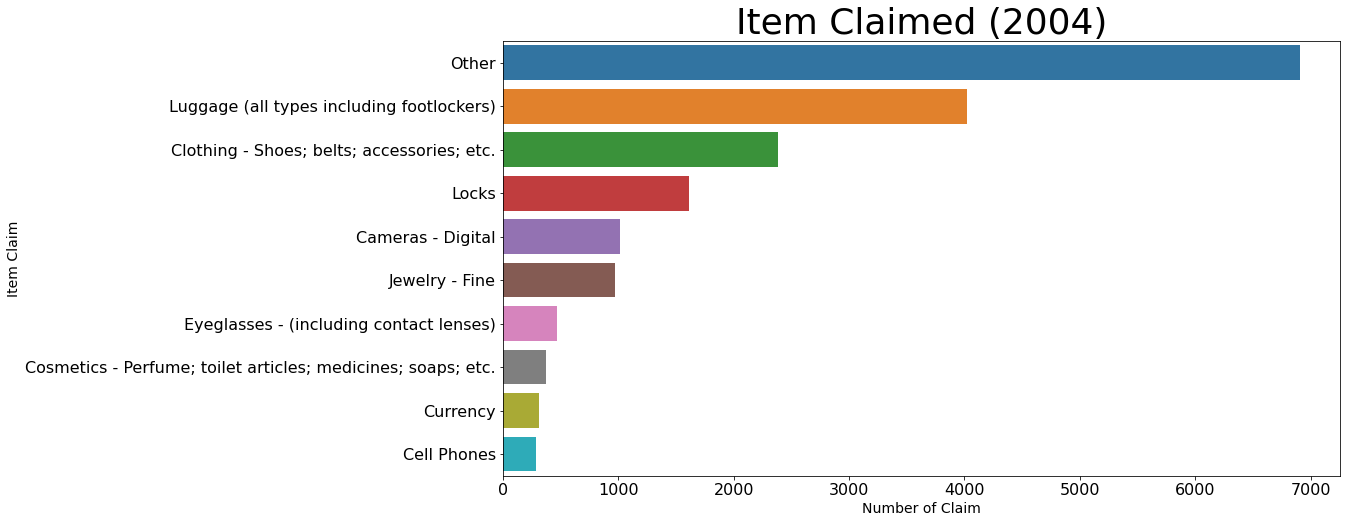

In [68]:
claim_item_2004 = df.loc[(df['year']==2004),'Item'].value_counts().nlargest(n=10)

claim_item_index = claim_item_2004.index
claim_item_values = claim_item_2004.values

plt.figure(figsize=(15,8))
sns.barplot(y=claim_item_index, x=claim_item_values, orient='horizontal')
plt.xlabel('Number of Claim', fontsize=14)
plt.ylabel('Item Claim', fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Item Claimed (2004)', fontsize=36)
plt.show()

- Dilihat dari grafik, claim yang diajukan mencapai angka tertinggi di Tahun 2004 dengan tipe claim tertinggi adalah Passenger Property Loss dan Property Damage.
- Menurut [referensi](
https://www.nytimes.com/2004/09/10/politics/us-to-pay-fliers-15-million-for-pilfering-of-checked-bags.html) tinggi nya angka tersebut terjadi semenjak pemeriksaan dilakukan secara tertutup oleh agen TSA. Setelah selesai dilakukan pengecekan, banyak penumpang yang protes dan mengajukan laporan terhadap kerusakan dan kehilangan beberapa barang seperti payung golf, pakaian, laptop-computer, dan beberapa barang lainnya. Setelah ditelusuri lebih lanjut ternyata kejadian tersebut disebabkan oleh pencurian oleh agen TSA sendiri.
- Selain itu, property damage juga disebabkan karena penggunakan X-Ray terutama untuk item seperti Camera.

Setelah kejadian tersebut, berdasarkan artikel yang disebutkan pada [referensi](https://reason.org/wp-content/uploads/files/ee580fb1515e98c9bd64e9aa5ea18ed3.pdf), TSA mulai melakukan perbaikan seperti bekerjasama dengan vendor yang sudah memenuhi requirement dari TSA. Selain itu TSA melakukan training untuk passanger screener pada agen TSA. 

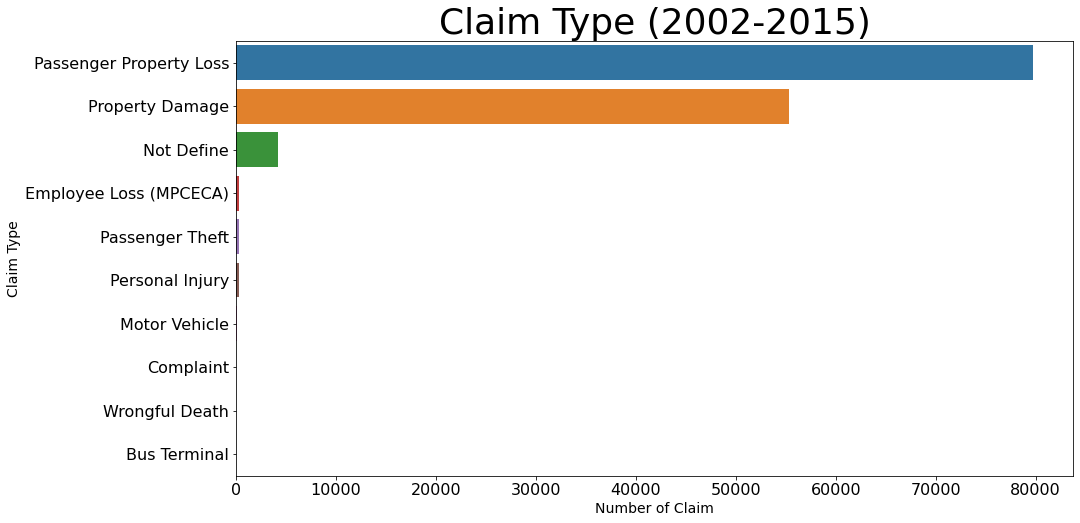

In [69]:
unique_claim_type = df['Claim Type'].value_counts().nlargest(n=10)

claim_index = unique_claim_type.index
claim_values = unique_claim_type.values

plt.figure(figsize=(15,8))
sns.barplot(y=claim_index, x=claim_values, orient='horizontal')
plt.xlabel('Number of Claim', fontsize=14)
plt.ylabel('Claim Type', fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Claim Type (2002-2015)', fontsize=36)
plt.show()

<AxesSubplot:xlabel='Claim Type'>

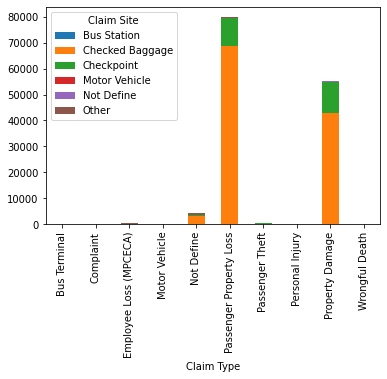

In [70]:
new = df[['Claim Type', 'Claim Site']]
count_claimtype = df['Claim Type'].value_counts()
crosstab = pd.crosstab( index=df['Claim Type'], columns=df['Claim Site'])
crosstab.plot(kind="bar", stacked=True, rot=90)

Grafik diatas menunjukkan claim type dari tahun 2002-2015. Claim type tertinggi adalah Passenger Property Loss dan Property Damage yang mana claim type tersebut sama dengan claim type tertinggi di tahun 2004. Sehingga dapat disimpulkan bahwa kedua claim type tersebut adalah claim type yang sering terjadi sepanjang tahun dan akan menjadi fokus untuk perbaikan.
Untuk claim type Passanger property loss dan property damage, kejadian banyak ditemukan pada titik checked baggage.

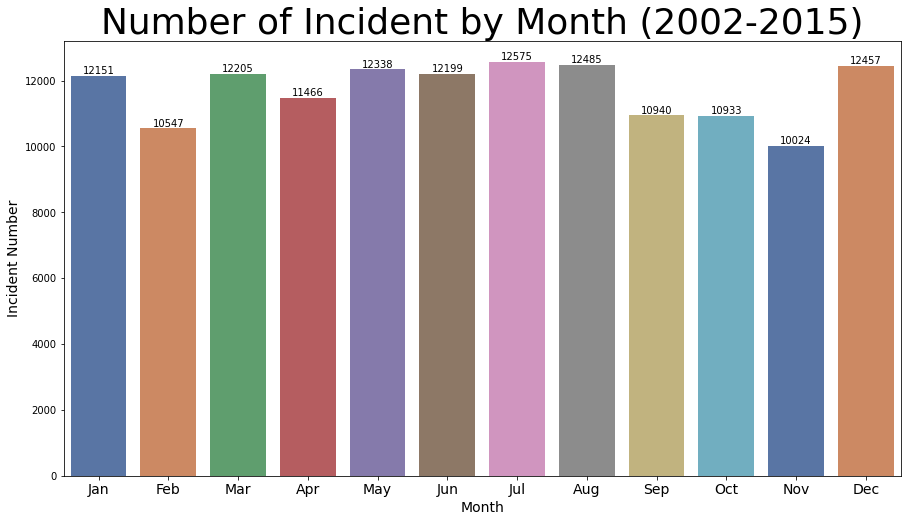

In [71]:
claims_count = df['month'].value_counts()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(15, 8))
mplot=sns.barplot(claims_count.index, claims_count.values, palette = 'deep')
mplot.grid(False)
plt.xlabel('Month', size=14)
plt.ylabel('Incident Number', size=14)
plt.xticks(range(12), months, fontsize=14)
plt.bar_label(mplot.containers[0])
plt.title('Number of Incident by Month (2002-2015)', fontsize=36 )
plt.show()


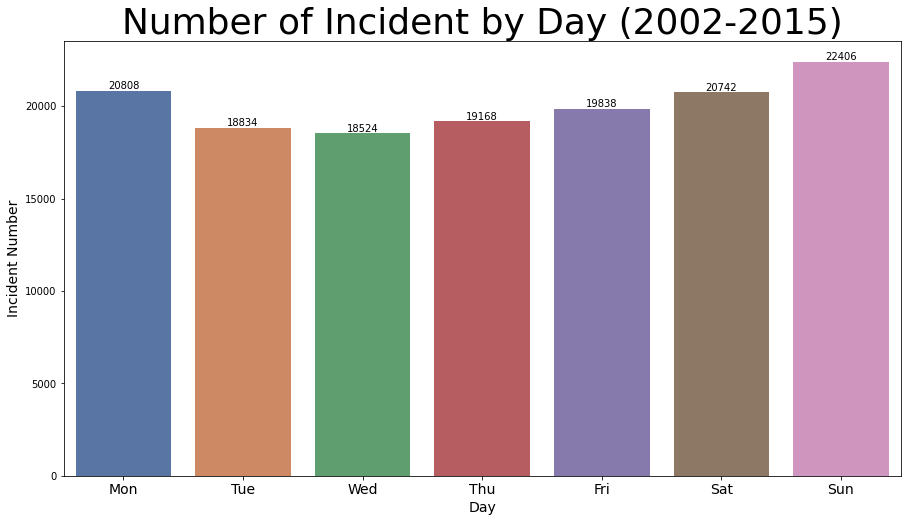

In [72]:
claims_count = df['day'].value_counts()
day = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

plt.figure(figsize=(15, 8))
dplot=sns.barplot(claims_count.index, claims_count.values, palette = 'deep')
dplot.grid(False)
plt.xlabel('Day', size=14)
plt.ylabel('Incident Number', size=14)
plt.xticks(range(7), day, fontsize=14)
plt.bar_label(dplot.containers[0])
plt.title('Number of Incident by Day (2002-2015)', fontsize=36 )
plt.show()


- Jika dilihat berdasarkan bulan, insiden terbanyak terjadi pada bulan Desember-Januari dan rata-rata pada pertengahan tahun. Hal ini dikarenakan libur musim dingin dan libur musim panas sekolah di Amerika Serikat ([referensi](https://myskill.id/blog/masa-kuliah/sistem-pendidikan-amerika/)). Sehingga, orang banyak melakukan travelling ([referensi](https://www.universitas123.com/news/libur-musim-dingin-di-amerika-para-murid-amerika-melakukan-ini)).
- Jika dilihat Berdasarkan hari, insiden terbanyak terjadi pada hari Minggu.

TSA harus menyiapkan sumber daya ekstra pada bulan dan hari tersebut. Namun karena terdapat perbedaan yang tidak terlalu signifikan, penyelesaian masalah tetap harus fokus sepanjang waktu, tidak berdasarkan bulan ataupun hari. 

## 2. Item apa yang sering diajukan claim?

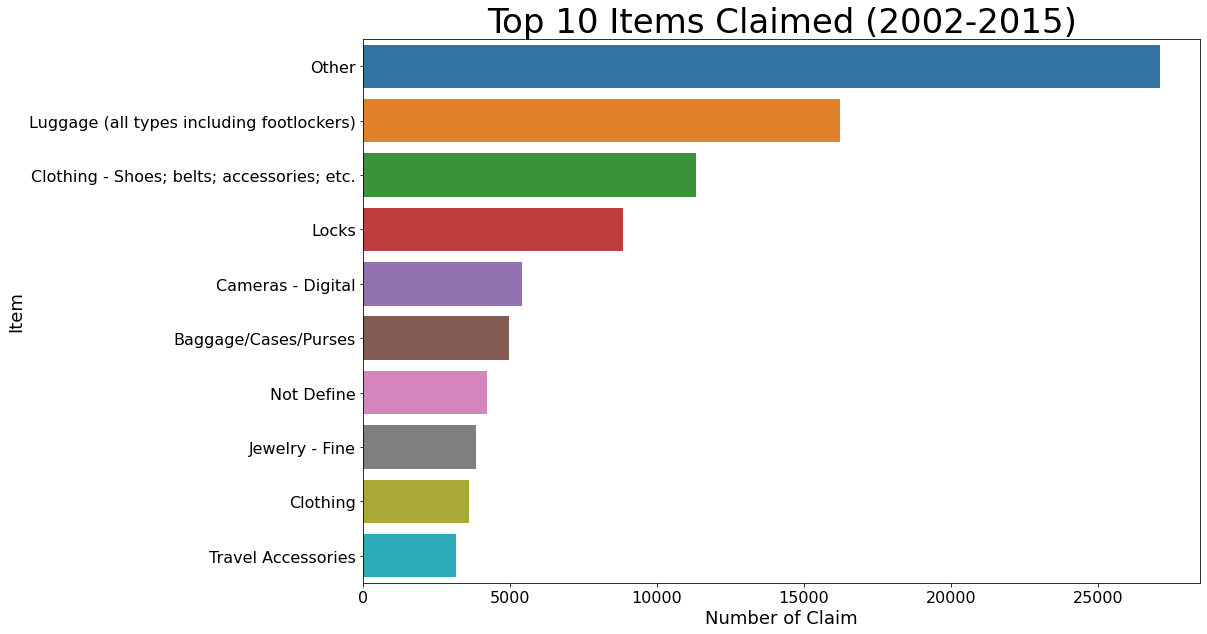

In [73]:
unique_claim_item = df['Item'].value_counts().nlargest(n=10)

item_index = unique_claim_item.index
item_values = unique_claim_item.values

plt.figure(figsize=(15,10))
sns.barplot(y=item_index, x=item_values, orient='horizontal')
plt.xlabel('Number of Claim', fontsize=18)
plt.ylabel('Item', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Top 10 Items Claimed (2002-2015)',fontsize=34)
plt.show()

Grafik diatas menunjukkan 10 item claim terbanyak. Item tersebut diantaranya bagasi(termasuk footlockers), baju, ikat pinggang, perhiasan, kamera, laptop, dll. Dimana benda-benda tersebut adalah benda yang paling sering dibawa bepergian oleh para traveller, dan juga benda yang paling mudah dicuri.

## 3. Apakah insiden terspusat pada bandara tertentu?

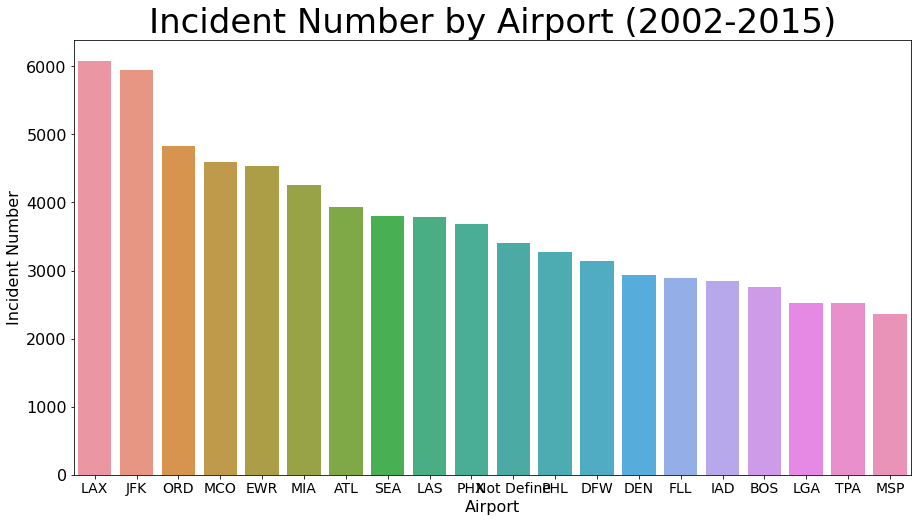

In [74]:
unique_airport_code = df['Airport Code'].value_counts().nlargest(n=20)

airport_index = unique_airport_code.index
airport_values = unique_airport_code.values

plt.figure(figsize=(15,8))
sns.barplot(x=airport_index, y=airport_values)
plt.xlabel('Airport', fontsize=16)
plt.ylabel('Incident Number', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.title('Incident Number by Airport (2002-2015)', fontsize=34)
plt.show()

Claim banyak terjadi di Los Angeles International Airport (LAX). Hal ini sesuai dengan yang disampaikan pada berita (dapat dilihat [di sini](https://www.sun-sentinel.com/la-fi-travel-briefcase-20110530-story.html)) dimana record data pada Tahun 2007-2010 menunjukkan insiden terbanyak terjadi di LAX dengan total claim yang masuk sebesar 1.702 claim. 

John F. Kennedy International Airport (JFK) menjadi tempat penyumbang claim terbesar kedua setelah LAX. Dengan melihat grafik diatas, penanganan masalah akan difokuskan di Airport LAX dan JFK karena pada posisi ke-3 yaitu bandara O'Hare International Airport (ORD) memiliki nilai yang cukup signifikan dengan 2 bandara peringkat tertinggi.


## 3. Apakah Terdapat Error pada Sistem?
Untuk Kolom Claim Amount dan Close Amount dengan kondisi Disposition *Approved* harus bernilai sama, sehingga akan dilakukan uji statistik untuk membuktikan apakah terdapat perbedaan pada nilai tersebut. Dalam hal ini akan dilakukan pengujian dengan metode **Wilcoxon**, karena terdapat 2 kondisi berpasangan dan data tidak terdistribusi normal.

In [75]:
amount= df.loc[(df['Disposition']=='Approved')]

df_amount = pd.DataFrame({
    'NO' : amount['Close Amount'],
    'YES': amount['Claim Amount']
})

df_amount['diff_amount'] = df_amount['YES'] - df_amount['NO']
df_amount.head()


,NO,YES,diff_amount
3,50.00,50.00,0.0
4,84.79,84.79,0.0
6,106.52,106.52,0.0
7,75.00,75.00,0.0
10,79.95,79.95,0.0


In [76]:
# H0 : median population of difference = 0
# Ha : median population of difference < 0

sumrank, pvalue = wilcoxon(df_amount['diff_amount'], alternative ='two-sided', correction=True)

print('p_value : ', pvalue)
print(sumrank)

if pvalue < 0.05 :
    print('Tolak H0')
else :
    print('Terima H0')

p_value :  0.8837889988366758
162447.5
Terima H0


In [77]:
amount[['Close Amount','Claim Amount']].sum()

Close Amount    2049848.42
Claim Amount    2055873.38
dtype: float64

Hasil uji statistik menunjukkan nilai p-value < 0.05. Sehingga kesimpulannya H0 ditolak yang berarti nilai pada Claim Amount dan Close Amount pada kondisi *Denied* dan *Approved* berbeda. Hal ini dapat dibuktikan juga dengan perhitungan jumlah claim amount dan close amount dengan kondisi tersebut. Dimana nilai Claim Amount lebih besar dari close amount. Dari hasil tersebut terdapat beberapa kemungkinan :
1. Close Amount tidak diinput dengan benar
2. Terdapat kesalahan input pada Claim Amount

Jika terdapat kesalahan input, hal ini dapat merugikan TSA karena bisa menyebabkan seolah-olah memiliki tunggakan pembayaran.

In [78]:
amount[['Close Amount','Claim Amount']].corr(method = 'spearman')

,Close Amount,Claim Amount
Close Amount,1.00000,0.98406
Claim Amount,0.98406,1.00000


Hubungan antara 2 data pada kolom Claim Amount dan Close Amount ditunjukkan pada hasil diatas. Korelasi antara keduanya menunjukkan hubungan yang kuat karena nilai korelasi berada pada rentang 0.7 - 1 yaitu sebesar 0.98406

In [79]:
df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,year,year_received,month,day
1,0202417M,2002-02-02,2004-01-16,SEA,Seattle-Tacoma International,Not Define,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.00,Settled,50.00,Settled,2004,2002,1,4
3,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approved,2003,2002,1,0
4,2005032379513,2002-02-18,2005-02-05,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approved,84.79,Approved,2005,2002,2,5
6,2007050124750,2002-04-30,2007-04-26,PHL,Philadelphia International Airport,USAir,Passenger Property Loss,Checked Baggage,Professional Equipment,106.52,Approved,106.52,Approved,2007,2002,4,3
7,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Not Define,Checkpoint,Clothing - Shoes; belts; accessories; etc.,75.00,Approved,75.00,Approved,2002,2002,5,3


# <center> **SUMMARY AND SUGGESTION** <center/>
---
---

## Summary
Hasil analisis diatas memberikan informasi terkait claim yang diajukan ke TSA antara lain sebagai berikut:

1. Claim yang diajukan dari tahun ke tahun mulai mengalami penurunan, namun jumlah claim masih tinggi yaitu 5.802 insiden pada tahun 2015, sehingga perlu dilakukan evaluasi dan perbaikan.
2. Claim type tertinggi adalah Passenger Property Loss dan Property Damage dan banyak ditemukan pada titik checked baggage.
3. Penanganan masalah dapat difokuskan di Airport LAX dan JFK.
4. Pada musim liburan sekolah, terjadi peningkatan claim karena lebih banyak orang bepergian.

## Suggestion
Berikut adalah beberapa suggest yang bisa diterapkan terutama di Airport LAX dan JFK
1. Training agen TSA secara periodik untuk meningkatkan awareness dan kemampuan agen TSA / screener terhadap penanganan benda penumpang. Tujuan training ini adalah untuk menurunkan angka claim terhadap barang yang rusak (property damage).
2. Pihak TSA dapat membuat peraturan / kebijakan terkait sanksi berat yang diberikan kepada agen TSA yang melakukan pencurian dan atau perusakan barang penumpang agar terdapat efek jera pada agen TSA yang melakukan kecurangan.
3. Memberikan kamera CCTV tambahan terutama pada bagian checked baggage untuk memudahkan tracking jika terjadi kehilangan dan atau kerusakan.
4. Memberikan RFID pada koper untuk melakukan tracking baggage
5. TSA dapat mengganti standar kunci gembok TSA menjadi lebih aman, sehingga pihak lain selain pihak TSA tidak dapat melakukan duplikasi kunci (contoh: dengan menggunakan sidik jari atau gembok canggih yang terhubung dengan data yang akan terecord siapa yang membuka gembok tersebut terakhir kali)
6. Pada musim liburan, penanganan perlu ditingkatkan karena jumlah claim tertinggi terjadi pada bulan saat musim liburan sekolah.
7. Melakukan penggantian X-Ray dengan X-Ray lain yang lebih proper, sehingga resiko terhadap kerusakan benda-benda elektronik akibat X-Ray dapat berkurang.
8. Meningkatkan system input data claim TSA, agar data claim yang dianalisis dapat lebih akurat seperti:
- Tidak dapat menggunakan special character pada claim amount dan close amount
- Wajib mengisi seluruh kolom
- Format pada Incident Date dan Date Received harus sama
- Apabila kolom Status Denied, maka secara otomatis close amount akan bernilai 0.

In [80]:
file_name = 'TSAClaims.xlsx'
  
# saving the excel
df.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.
